# BDSI Data Mining Group
# Day 1 - Exploring - 6/21/22

Today will be be reading in and exploring a useful dataset which combines many different sources on population and health data. We will also use this time to start reviewing and practicing data cleaning in `R` as well as using Jupyter notebooks.

## Jupyter notebooks

Take a moment to read [this](https://nbviewer.org/github/jupyter/notebook/blob/main/docs/source/examples/Notebook/Notebook%20Basics.ipynb) and practice adding a Markdown cell, a code cell, and then deleting both of them using shortcuts. This [website](https://towardsdatascience.com/jypyter-notebook-shortcuts-bf0101a98330) has a useful summary of shortcuts.

## R packages 

We will use the packages `tidyr`, `dplyr`, and `stringr` for data cleaning and `ggplot2` for visualization. You can find nice cheatsheets for these different packages [here](https://www.rstudio.com/resources/cheatsheets/). Please download and save them in a place you will be able to find them!

You will also get more formal review of these packages during morning lectures on Thursday and Friday.

In [1]:
library(tidyr)
library(dplyr)
library(stringr)
library(ggplot2)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## AHRF Data

We will be looking at the **Area Health Resources Files** provided by the Health Resources & Services Administration.

From the [website](https://data.hrsa.gov/data/download): This dataset provides current as well as historic data for more than 6,000 variables for each of the nation’s counties, as well as state and national data. It contains information on health facilities, health professions, measures of resource scarcity, health status, economic activity, health training programs, and socioeconomic and environmental characteristics. In addition, the basic file contains geographic codes and descriptors which enable it to be linked to many other files and to aggregate counties into various geographic groupings. The Area Health Resources Files (AHRF) data are designed to be used by planners, policymakers, researchers, and others interested in the nation’s health care delivery system and factors that may impact health status and health care in the United States. The AHRF data includes county, state, and national-level files in eight broad areas: Health Care Professions, Health Facilities, Population Characteristics, Economics, Health Professions Training, Hospital Utilization, Hospital Expenditures, and Environment. The AHRF data are obtained from more than 60 sources. The AHRF has county, state, and national level files from the HRSA, Bureau of Health Workforce (BHW), National Center for Health Workforce Analysis (NCHWA) available for download.

## Read In Data

You can download the data from the group Canvas page. Once downloaded, place it in a folder called `AHRF` in your `raw-data` directory.

From the documentation, we can see that the data is organized so that that each observation is a line of text and each variable takes up a specific number of characters in that line. We will use the `read_fwf` function from `readr` to read in data with this format.

In [2]:
library(readr)
?read_fwf

In the code below, I matched the character locations of the variables with variable names that are meaningful to me. 

**Exercise:** Check out the documentation [here](https://github.com/manncz/bdsi_22/blob/main/data/AHRF/ref/AHRF%202020-2021%20Technical%20Documentation.xlsx), and add the 2015-2019 "Median Gross Rent" variable. Call it `medRent_2019` and add it right after the `medIncome_2019` variable.

In [3]:
ahrf_raw  <- read_fwf("../raw-data/AHRF/ahrf2021.asc", 
  fwf_cols(stateFIPS = c(122,123), # 'state FIPS'
            cntyFIPS = c(124,126), # 'county FIPS'
            stateName = c(46,64),
            cntyName = c(67,91),
            pop_2020 = c(16844,16851), # 'population estimate'
            pop_2019 = c(16852,16859),
            pop_2018 = c(16860,16867),
            pop_2010 = c(16924,16931), # 'census population
            mort_2019 = c(23710,23715), # '3-Yr Total Deaths' 2017-19
            pctUrban_2010 = c(20470, 20473), # 'Percent urban population'
            vetPop_2020 = c(20556,20561), # 'veteran population estimate'
            mdcrEnr_2019 = c(20687,20693), # medicare enrolment aged & disabled total'
            mdcaidElig_2012 = c(21253,21260), # 'medicaid eligible (total)'
            medIncome_2019 = c(24541,24546), # 'median household income'
            pctPovty_2019 = c(25451,25454), # 'percent persons in poverty'
            snap_2018 = c(26067,26073), # 'food stamp/SNAP recipients (estimate)'
            pctNoIns_2019 = c(27390, 27393), # '% 18-64 without health insurance'     
            unplmtRate_2020 = c(31715,31717), # '16+ unemployment rate'
            popDens_2010 = c(31521, 31526) # 'population density'
  ),
  progress=FALSE
  )

Rows: 3230 Columns: 19
── Column specification ────────────────────────────────────────────────────────────────────────

chr (19): stateFIPS, cntyFIPS, stateName, cntyName, pop_2020, pop_2019, pop_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
# the head command allows us to look at the first rows of the data
head(ahrf_raw)

stateFIPS,cntyFIPS,stateName,cntyName,pop_2020,pop_2019,pop_2018,pop_2010,mort_2019,pctUrban_2010,vetPop_2020,mdcrEnr_2019,mdcaidElig_2012,medIncome_2019,pctPovty_2019,snap_2018,pctNoIns_2019,unplmtRate_2020,popDens_2010
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
01,001,Alabama,Autauga,00056145,00055869,00055601,00054571,000536,0580,005746,0011059,00010029,058233,0121,0007477,0120,049,017300
01,003,Alabama,Baldwin,00229287,00223234,00218022,00182265,002276,0577,019614,0053490,00032213,059871,0101,0019499,0138,056,038480
01,005,Alabama,Barbour,00024589,00024686,00024881,00027457,000322,0322,001875,0006152,00008124,035972,0271,0005898,0168,070,006100
01,007,Alabama,Bibb,00022136,00022394,00022400,00022915,000270,0316,001283,0004713,00005629,047918,0203,0003263,0139,066,005980
01,009,Alabama,Blount,00057879,00057826,00057840,00057322,000706,0100,003758,0013044,00011791,052902,0163,0005760,0181,041,010300
01,011,Alabama,Bullock,00009976,00010101,00010138,00010914,000118,0486,000429,0002259,00003986,031906,0300,0002697,0148,055,004150


## Variables

The first thing I notice is that all of the variables are read in as characters and they have leading zeros. 

**Check in:** How do you think we should treat these variables?

To start, convert `medIncome_2019` to a numeric variable and summarize it. Do the values make sense?

In [5]:
checkIncome <- as.numeric(ahrf_raw$medIncome_2019)
summary(checkIncome)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  24732   46243   53341   55713   62059  151806      89 

These values seem reasonable, so it seems like we can convert these variables to numeric as a start.

You probably got a warning message "NAs introduced by coercion". In this case, we are not worried about it, but it is always good to pause and check when you get a warning message!

To covert many variables to numeric, we can use `mutate` and `across` from the `dplyr` package. We will also practice using "pipes" `%>%`.

In [ ]:
?mutate

In [6]:
ahrf_num1 <- mutate(ahrf_raw, across(pop_2020:popDens_2010, ~as.numeric(.x)))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$e

The pipe below tells R to put `ahrf_raw` in the first position of the `mutate` function, so they do the exact same thing. This is useful once you start combining many steps in an analysis.

In [7]:
ahrf_num <- ahrf_raw %>%
mutate(across(pop_2020:popDens_2010, ~as.numeric(.x)))

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$e

In [8]:
head(ahrf_num)
head(ahrf_num1)

stateFIPS,cntyFIPS,stateName,cntyName,pop_2020,pop_2019,pop_2018,pop_2010,mort_2019,pctUrban_2010,vetPop_2020,mdcrEnr_2019,mdcaidElig_2012,medIncome_2019,pctPovty_2019,snap_2018,pctNoIns_2019,unplmtRate_2020,popDens_2010
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01,001,Alabama,Autauga,56145,55869,55601,54571,536,580,5746,11059,10029,58233,121,7477,120,49,17300
01,003,Alabama,Baldwin,229287,223234,218022,182265,2276,577,19614,53490,32213,59871,101,19499,138,56,38480
01,005,Alabama,Barbour,24589,24686,24881,27457,322,322,1875,6152,8124,35972,271,5898,168,70,6100
01,007,Alabama,Bibb,22136,22394,22400,22915,270,316,1283,4713,5629,47918,203,3263,139,66,5980
01,009,Alabama,Blount,57879,57826,57840,57322,706,100,3758,13044,11791,52902,163,5760,181,41,10300
01,011,Alabama,Bullock,9976,10101,10138,10914,118,486,429,2259,3986,31906,300,2697,148,55,4150


stateFIPS,cntyFIPS,stateName,cntyName,pop_2020,pop_2019,pop_2018,pop_2010,mort_2019,pctUrban_2010,vetPop_2020,mdcrEnr_2019,mdcaidElig_2012,medIncome_2019,pctPovty_2019,snap_2018,pctNoIns_2019,unplmtRate_2020,popDens_2010
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01,001,Alabama,Autauga,56145,55869,55601,54571,536,580,5746,11059,10029,58233,121,7477,120,49,17300
01,003,Alabama,Baldwin,229287,223234,218022,182265,2276,577,19614,53490,32213,59871,101,19499,138,56,38480
01,005,Alabama,Barbour,24589,24686,24881,27457,322,322,1875,6152,8124,35972,271,5898,168,70,6100
01,007,Alabama,Bibb,22136,22394,22400,22915,270,316,1283,4713,5629,47918,203,3263,139,66,5980
01,009,Alabama,Blount,57879,57826,57840,57322,706,100,3758,13044,11791,52902,163,5760,181,41,10300
01,011,Alabama,Bullock,9976,10101,10138,10914,118,486,429,2259,3986,31906,300,2697,148,55,4150


We can see that the code converted all of the variables of interest into numeric variables!

**Check in:** Pause with your partner and talk about what the syntax of the code above meant. You might want to look at the documentation for `across`

Now, we can take a look at what all of the variables ranges are. 

**Check in:** Do you notice anything that doesn't seem quite right?

In [9]:
summary(ahrf_num)

  stateFIPS           cntyFIPS          stateName           cntyName        
 Length:3230        Length:3230        Length:3230        Length:3230       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    pop_2020          pop_2019           pop_2018           pop_2010      
 Min.   :     87   Min.   :      86   Min.   :      88   Min.   :     82  
 1st Qu.:  11043   1st Qu.:   11131   1st Qu.:   11139   1st Qu.:  11310  
 Median :  26105   Median :   26108   Median :   26092   Median :  26097  
 Mean   : 103326   Mean   :  102950   Mean   :  102617   Mean   :  96973  
 3rd Qu.:

There are a couple of variables that should be percentages, but that have maximum values of 200 or 400! Looking back at the documentation, we can see that these variables had "(.1)" at the beginning of their description, indicating that we need to multiply them by .1 to get the correct values.

We can use very similar code as above.

In [10]:
ahrf_cleaner <- ahrf_num %>%
  mutate(across(starts_with("pct")| starts_with("unplmt"), ~.x*.1))

head(ahrf_cleaner)
summary(ahrf_cleaner)

stateFIPS,cntyFIPS,stateName,cntyName,pop_2020,pop_2019,pop_2018,pop_2010,mort_2019,pctUrban_2010,vetPop_2020,mdcrEnr_2019,mdcaidElig_2012,medIncome_2019,pctPovty_2019,snap_2018,pctNoIns_2019,unplmtRate_2020,popDens_2010
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01,001,Alabama,Autauga,56145,55869,55601,54571,536,58.0,5746,11059,10029,58233,12.1,7477,12.0,4.9,17300
01,003,Alabama,Baldwin,229287,223234,218022,182265,2276,57.7,19614,53490,32213,59871,10.1,19499,13.8,5.6,38480
01,005,Alabama,Barbour,24589,24686,24881,27457,322,32.2,1875,6152,8124,35972,27.1,5898,16.8,7.0,6100
01,007,Alabama,Bibb,22136,22394,22400,22915,270,31.6,1283,4713,5629,47918,20.3,3263,13.9,6.6,5980
01,009,Alabama,Blount,57879,57826,57840,57322,706,10.0,3758,13044,11791,52902,16.3,5760,18.1,4.1,10300
01,011,Alabama,Bullock,9976,10101,10138,10914,118,48.6,429,2259,3986,31906,30.0,2697,14.8,5.5,4150


  stateFIPS           cntyFIPS          stateName           cntyName        
 Length:3230        Length:3230        Length:3230        Length:3230       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
    pop_2020          pop_2019           pop_2018           pop_2010      
 Min.   :     87   Min.   :      86   Min.   :      88   Min.   :     82  
 1st Qu.:  11043   1st Qu.:   11131   1st Qu.:   11139   1st Qu.:  11310  
 Median :  26105   Median :   26108   Median :   26092   Median :  26097  
 Mean   : 103326   Mean   :  102950   Mean   :  102617   Mean   :  96973  
 3rd Qu.:

That makes more sense now!

Putting this all together, I am going to save a new data file called `ahrf` with the cleaned numeric variables.

Using pipes is very useful because I have combined 4 steps here! It would be a lot more confusing to nest all of them.


In [11]:
ahrf <- ahrf_raw %>%
  mutate(across(pop_2020:popDens_2010, ~as.numeric(.x))) %>%
  mutate(across(starts_with("pct")| starts_with("unplmt"), ~.x*.1)) %>%
  mutate(FIPS=paste0(sprintf('%s', stateFIPS), sprintf('%s', cntyFIPS))) %>%
  select(FIPS, everything())

Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$eval_all_mutate(quo):
“NAs introduced by coercion”
Warning message in mask$e

**Check in:** What do the last two lines of the code I included do?

In [12]:
head(ahrf)

FIPS,stateFIPS,cntyFIPS,stateName,cntyName,pop_2020,pop_2019,pop_2018,pop_2010,mort_2019,pctUrban_2010,vetPop_2020,mdcrEnr_2019,mdcaidElig_2012,medIncome_2019,pctPovty_2019,snap_2018,pctNoIns_2019,unplmtRate_2020,popDens_2010
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
01001,01,001,Alabama,Autauga,56145,55869,55601,54571,536,58.0,5746,11059,10029,58233,12.1,7477,12.0,4.9,17300
01003,01,003,Alabama,Baldwin,229287,223234,218022,182265,2276,57.7,19614,53490,32213,59871,10.1,19499,13.8,5.6,38480
01005,01,005,Alabama,Barbour,24589,24686,24881,27457,322,32.2,1875,6152,8124,35972,27.1,5898,16.8,7.0,6100
01007,01,007,Alabama,Bibb,22136,22394,22400,22915,270,31.6,1283,4713,5629,47918,20.3,3263,13.9,6.6,5980
01009,01,009,Alabama,Blount,57879,57826,57840,57322,706,10.0,3758,13044,11791,52902,16.3,5760,18.1,4.1,10300
01011,01,011,Alabama,Bullock,9976,10101,10138,10914,118,48.6,429,2259,3986,31906,30.0,2697,14.8,5.5,4150


## Observations

**Check in:** What does one observation in the data represent?

How many "states" are in the data?

In [13]:
length(unique(ahrf$stateFIPS))

[1] 54

I thought there were only 50 states in the US? 

**Exercise:** Investigate why there are 54 state FIPS code in the data.

In [ ]:
## YOUR CODE HERE ##

**Exercise:** Subset the data so that it only includes counties from the continental US. Assign this dataset as `ahrf_cont`.


In [ ]:
## YOUR CODE HERE ##

We have what we will consider to be a "tidy" dataset, with the variables and observations that we would like. Save the data for use tomorrow.

In [ ]:
save(ahrf, file = "../temp/ahrfDat.Rdata")

## Exploratory Data Analysis

For the rest of our time, check out the tidy data! Some suggestions of things you could look at:


1.  Variable missingness
2.  Correlation between variables
3.  Geographic patterns of variables
4.  Summaries across states



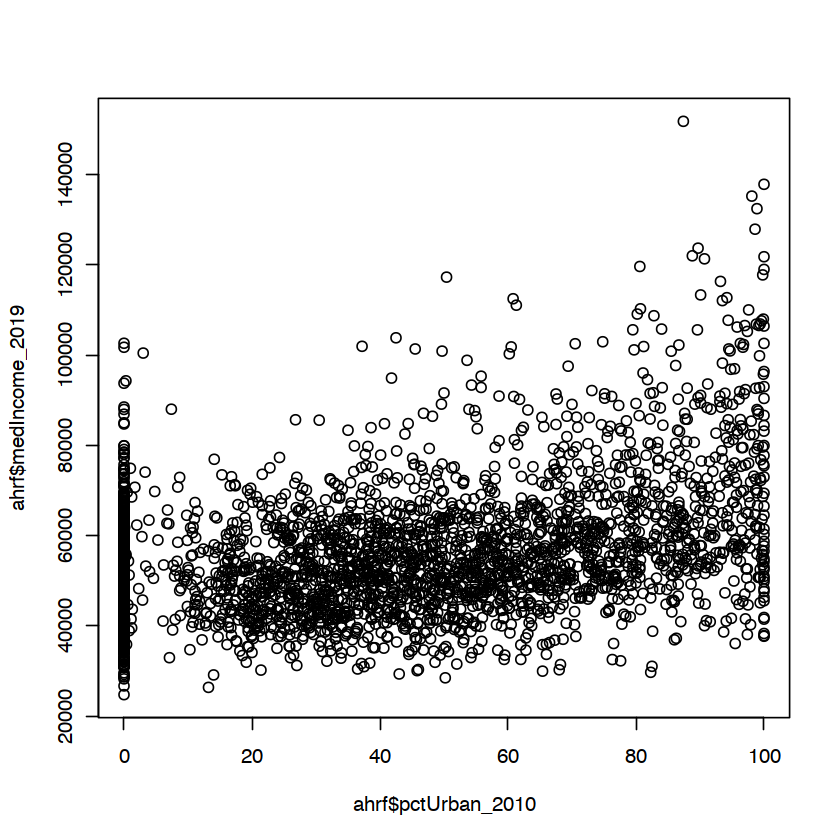

In [15]:
plot(ahrf$pctUrban_2010, ahrf$medIncome_2019)

In [ ]:
## YOUR CODE HERE ##